Generating fingerprints for the user input file

In [49]:
#Reading the user input file and then making a 
from openeye.oechem import *
from openeye.oegraphsim import *
import oenotebook as oenb
import os
ifname = "./targets.ism" 
ofname = "./drugsfp.oeb"


ifs = oemolistream()
if not ifs.open(ifname):
    OEThrow.Fatal("Cannot open input file!")
ofs = oemolostream()
if not ofs.open(ofname):
    OEThrow.Fatal("Cannot open output file!")
if ofs.GetFormat() != OEFormat_OEB:
    OEThrow.Fatal("%s output file has to be an OEBinary file!" % ofname)

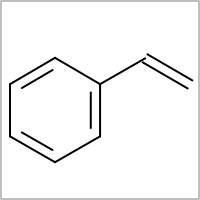

In [50]:
mols = []
qmol = OEGraphMol()
OEParseSmiles(qmol, "c1ccccc1cc")
mols.append(qmol)
oenb.draw_mol(qmol)

In [51]:
def GenerateFingerPrints(ifs, ofs):

    dots = OEDots(100000, 1000, "molecules")

    fptypes = [(OEFPType_Circular, "circular"),
               (OEFPType_Tree, "tree"),
               (OEFPType_Path, "path"),
               (OEFPType_MACCS166, "maccs")]

    fp = OEFingerPrint()
    for mol in ifs.GetOEGraphMols():
        dots.Update()
        for (fptype, fptag) in fptypes:
            OEMakeFP(fp, mol, fptype)
            mol.SetData(fptag, fp)
        OEWriteMolecule(ofs, mol)

    dots.Total()

In [52]:
GenerateFingerPrints(ifs, ofs)
ofs.close()

In [53]:
def CreateMolDatabaseIndexFile(ifname):
    idxfname = OEGetMolDatabaseIdxFileName(ifname)

    if os.path.exists(idxfname):
        OEThrow.Warning("%s index file already exists" % idxfname)
    elif not OECreateMolDatabaseIdx(ifname):
        OEThrow.Warning("Unable to create %s molecule index file", idxfname)

In [54]:
CreateMolDatabaseIndexFile(ifname)

In [55]:
qfs = oemolostream()
qfs.open("./querymol.ism")
def WriteMolecules(mols, ofs):
    uniqsmiles = set()
    for mol in mols:
        smi = OEMolToSmiles(mol)
        if smi not in uniqsmiles:
            uniqsmiles.add(smi)
            OEWriteMolecule(ofs, mol)
WriteMolecules(mols,qfs)
qfs.close()
ifs.close()

In [56]:
!head ./querymol.ism

C=Cc1ccccc1


In [59]:
ifs = oemolistream()
ofs = oemolostream()
ifs.open("./querymol.ism")
ofs.open("./querymolfp.oeb")

GenerateFingerPrints(ifs, ofs)
ofs.close()
ifs.close()

In [60]:
!head ./querymolfp.oeb


G���? �circular` �!HandledOEBTag:circularQD� �OEBaseOEFingerPrint-� �circular �OEFingerPrint�   h    �                           @                                                                                                                                                                 @               �                           �                                                                                          �                                                                                                                                                                                      �tree` �!HandledOEBTag:treeQ@� �OEBaseOEFingerPrint)� �tree �OEFingerPrint�   i     ?                                                                  �                                                                                                                             �                            �                                                

In [61]:
#now like before, we can perform the similarity search and find the molecules with the highest fingerprint similarity.
